In [1]:
# Import the necessary modules

import pandas as pd
import numpy as np
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Use 'read.csv' function to read the csv file

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/606 - Capstone/Coursera.csv')
data.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course URL          3522 non-null   object
 5   Course Description  3522 non-null   object
 6   Skills              3522 non-null   object
dtypes: object(7)
memory usage: 192.7+ KB


## Step I. Data Cleaning

#### 1. Check for inaccurate values

In [5]:
data[['Course Rating', 'Difficulty Level']].head(25)

,Course Rating,Difficulty Level
0,4.8,Beginner
1,4.8,Beginner
2,4.1,Advanced
3,4.8,Intermediate
4,4.6,Beginner
5,4.7,Beginner
6,3.3,Advanced
7,4.9,Intermediate
8,4.3,Intermediate
9,Not Calibrated,Intermediate


From the above output we can see that there are non-float values in the Course Rating column and also unnecessary values in the the Difficulty Level column.

In [6]:
# Use the 'index' function to get the indices of the non-float values in the Course Rating column

ind1 = data.index[data['Course Rating']=='Not Calibrated']
print(ind1)

Int64Index([   9,  103,  136,  140,  153,  188,  249,  278,  299,  311,  362,
             375,  544,  570,  765,  781,  787,  814,  833, 1102, 1114, 1115,
            1266, 1358, 1414, 1440, 1458, 1607, 1621, 1631, 1646, 1677, 1717,
            1730, 1760, 1851, 1894, 1902, 1920, 1931, 1940, 2024, 2025, 2043,
            2069, 2139, 2152, 2201, 2207, 2333, 2336, 2349, 2358, 2377, 2388,
            2427, 2467, 2469, 2470, 2527, 2572, 2601, 2675, 2676, 2766, 2852,
            2928, 2974, 2975, 3108, 3114, 3119, 3173, 3259, 3277, 3318, 3379,
            3402, 3432, 3443, 3467, 3511],
           dtype='int64')


In [7]:
# Use 'drop' method to remove the unneccesary values in the Course Rating columns

data.drop(ind1, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3440 entries, 0 to 3521
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3440 non-null   object
 1   University          3440 non-null   object
 2   Difficulty Level    3440 non-null   object
 3   Course Rating       3440 non-null   object
 4   Course URL          3440 non-null   object
 5   Course Description  3440 non-null   object
 6   Skills              3440 non-null   object
dtypes: object(7)
memory usage: 215.0+ KB


In [9]:
# Repeat the same steps as above to remove the irrelevant values in 'Difficulty Level' column

ind2 = data.index[data['Difficulty Level']=='Not Calibrated']
data.drop(ind2, inplace=True)

# Use 'reset_index' method to reset the indices, starting from zero

data.reset_index(inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               3392 non-null   int64 
 1   Course Name         3392 non-null   object
 2   University          3392 non-null   object
 3   Difficulty Level    3392 non-null   object
 4   Course Rating       3392 non-null   object
 5   Course URL          3392 non-null   object
 6   Course Description  3392 non-null   object
 7   Skills              3392 non-null   object
dtypes: int64(1), object(7)
memory usage: 212.1+ KB


In [11]:
# Check if all the irrelevant values are removed

temp = data.index[data['Course Rating']=='Not Calibrated']
temp1 = data.index[data['Difficulty Level']=='Not Calibrated']
print(temp)
print(temp1)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


From the above output we can see that all the irrelavant values were removed from the course rating column, hence both the temp variables are empty.

#### 2. Check for inaccurate data types

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   index               3392 non-null   int64 
 1   Course Name         3392 non-null   object
 2   University          3392 non-null   object
 3   Difficulty Level    3392 non-null   object
 4   Course Rating       3392 non-null   object
 5   Course URL          3392 non-null   object
 6   Course Description  3392 non-null   object
 7   Skills              3392 non-null   object
dtypes: int64(1), object(7)
memory usage: 212.1+ KB


From the above response we can see that the there is one possible inaccuracy in the data types i.e., the data type of course can be changed to float type.

In [13]:
# Use 'astype' function to change the data type to float

data['Course Rating'] = data['Course Rating'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               3392 non-null   int64  
 1   Course Name         3392 non-null   object 
 2   University          3392 non-null   object 
 3   Difficulty Level    3392 non-null   object 
 4   Course Rating       3392 non-null   float64
 5   Course URL          3392 non-null   object 
 6   Course Description  3392 non-null   object 
 7   Skills              3392 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 212.1+ KB


From the above output we can see that the data type of Course Rating column has changed to float type.

#### 3. Check for redundant values

In [14]:
# Use 'duplicated' method to check for null values, and then 'sum' method to get the total count of redundant values

redundantValues = data.duplicated()
redundantValues.sum()

0

From the above output we can see that there are no redundant values.

#### 4. Check for null values

In [15]:
# Use 'isnull' method to check for null values, and then 'sum' method to get the total count of null values

nullValues = data.isnull()
nullValues.sum()

index                 0
Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course URL            0
Course Description    0
Skills                0
dtype: int64

From the above output we can see that there are no null values in the dataset.

#### 5. Removing the non-alphabetic characters in University and Course Name colummns

In [16]:
data.head(20)

,index,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,5,Building Test Automation Framework using Selen...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/building-test-a...,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
6,6,Doing Business in China Capstone,The Chinese University of Hong Kong,Advanced,3.3,https://www.coursera.org/learn/doing-business-...,Doing Business in China Capstone enables you t...,marketing plan Planning Marketing consumpti...
7,7,"Programming Languages, Part A",University of Washington,Intermediate,4.9,https://www.coursera.org/learn/programming-lan...,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,8,The Roles and Responsibilities of Nonprofit Bo...,The State University of New York,Intermediate,4.3,https://www.coursera.org/learn/nonprofit-gov-2,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
9,10,Agile Projects: Developing Tasks with Taiga,Coursera Project Network,Beginner,4.0,https://www.coursera.org/learn/developing-agil...,"By the end of this guided project, you will be...",project modeling Project Management agile m...


From the above ouput we can see that there are invalid characters in the rows 2 and 17. And these are just few rows, there are other rows which have similar invalid characters. In the below cell these invalid characters will be reomved.

In [17]:
# Use regex to remove all non-alphabetic characters from the 'University' column by replacing them with ''

data['University'] = data['University'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [18]:
data.head(20)

,index,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...
5,5,Building Test Automation Framework using Selen...,Coursera Project Network,Beginner,4.7,https://www.coursera.org/learn/building-test-a...,Selenium is one of the most widely used functi...,maintenance test case test automation scree...
6,6,Doing Business in China Capstone,The Chinese University of Hong Kong,Advanced,3.3,https://www.coursera.org/learn/doing-business-...,Doing Business in China Capstone enables you t...,marketing plan Planning Marketing consumpti...
7,7,"Programming Languages, Part A",University of Washington,Intermediate,4.9,https://www.coursera.org/learn/programming-lan...,This course is an introduction to the basic co...,inference ml (programming language) higher-o...
8,8,The Roles and Responsibilities of Nonprofit Bo...,The State University of New York,Intermediate,4.3,https://www.coursera.org/learn/nonprofit-gov-2,This course provides a more in-depth look at t...,Planning Peer Review fundraising strategic ...
9,10,Agile Projects: Developing Tasks with Taiga,Coursera Project Network,Beginner,4.0,https://www.coursera.org/learn/developing-agil...,"By the end of this guided project, you will be...",project modeling Project Management agile m...


In the above output we can see that there are no invalid characters in the University column.

Similar to the University column, there are special characters that have to be removed from Course Name and Course Description columns.

In [19]:
# Use regex to remove all non-alphabetic characters from the 'Course Name' and 'Course Description' columns by replacing them with ''

data['Course Name'] = data['Course Name'].str.replace(r'[^a-zA-Z\s]', '', regex=True)
data['Course Description'] = data['Course Description'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3392 entries, 0 to 3391
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               3392 non-null   int64  
 1   Course Name         3392 non-null   object 
 2   University          3392 non-null   object 
 3   Difficulty Level    3392 non-null   object 
 4   Course Rating       3392 non-null   float64
 5   Course URL          3392 non-null   object 
 6   Course Description  3392 non-null   object 
 7   Skills              3392 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 212.1+ KB


In [21]:
data

,index,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,1,Business Strategy Business Model Canvas Analys...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,By the end of this guided project you will be ...,Finance business plan persona (user experien...
2,2,Silicon Thin Film Solar Cells,cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,When it comes to numbers there is always more ...,accounts receivable dupont analysis analysis...
4,4,Retrieve Data using SingleTable SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course youll learn how to effectively ...,Data Analysis select (sql) database manageme...
...,...,...,...,...,...,...,...,...
3387,3517,Capstone Retrieving Processing and Visualizing...,University of Michigan,Beginner,4.6,https://www.coursera.org/learn/python-data-vis...,In the capstone students will build a series o...,Databases syntax analysis web Data Visuali...
3388,3518,Patrick Henry Forgotten Founder,University of Virginia,Intermediate,4.9,https://www.coursera.org/learn/henry,Give me liberty or give me death Remembering P...,retirement Causality career history of the ...
3389,3519,Business intelligence and data analytics Gener...,Macquarie University,Advanced,4.6,https://www.coursera.org/learn/business-intell...,Megatrends heavily influence todays organisati...,analytics tableau software Business Intellig...
3390,3520,Rigid Body Dynamics,Korea Advanced Institute of Science and Techno...,Beginner,4.6,https://www.coursera.org/learn/rigid-body-dyna...,This course teaches dynamics one of the basic ...,Angular Mechanical Design fluid mechanics F...


### With the above 5 steps we have finished data-cleaning tasks.

## Step II. Data Analysis and Visualization

Top 10 universities with highest course ratings:

In [22]:
# Use 'groupby' on 'University' column and apply mean to 'Course Rating' column

topRatings = data.groupby('University')['Course Rating'].mean().reset_index()
topRatings.sort_values('Course Rating', ascending=False, inplace=True)
topRatings.head(10)

,University,Course Rating
17,CertNexus,5.000000
100,SV Academy,5.000000
62,Karlsruhe Institute for Technology,5.000000
25,Curtis Institute of Music,4.950000
0,Advancing Women in Product,4.933333
18,Check Point Software Technologies Ltd,4.900000
36,Facebook,4.900000
19,Cloudera,4.850000
58,Institute for the Future,4.850000
76,Nanyang Technological University Singapore,4.833333


From the above output we can say that universities CertNexus, SV Academy, and Karlsruhe Institute for Technology have the highest course ratings.

In [23]:
topRatings.tail(10)

,University,Course Rating
28,EDHEC Business School,4.220000
101,Saint Petersburg State University,4.168000
84,New York University,4.141667
47,High Tech High Graduate School of Education,4.100000
45,HO,4.100000
75,Nanjing University,4.066667
159,University of Pittsburgh,4.016667
127,Universidad Nacional Autnoma de Mxico,4.000000
14,Carnegie Mellon University,3.600000
174,Yandex,3.500000


From the above output we can say that universities Universidad Nacional Autnoma de Mxico, Carnegie Mellon University, and Yandex have the lowest course ratings.

Average ratings of courses based on difficulty levels:

In [24]:
diffRatings = data.groupby('Difficulty Level')['Course Rating'].mean().reset_index()
diffRatings.sort_values('Course Rating', ascending=False, inplace=True)
diffRatings

,Difficulty Level,Course Rating
2,Conversant,4.596000
1,Beginner,4.592211
3,Intermediate,4.585298
0,Advanced,4.464087


From the above output we can see that courses from almost all difficulty levels have average course rating of 4.5

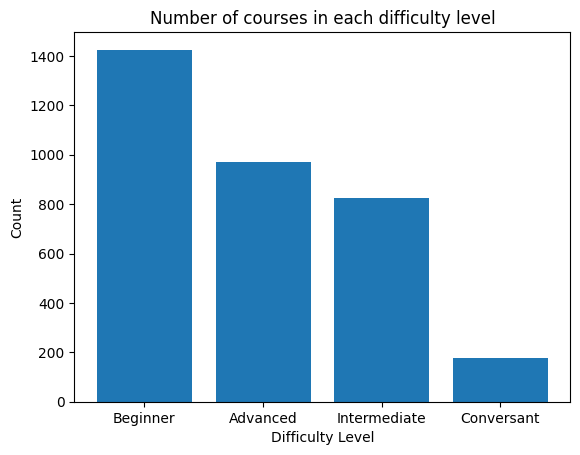

In [25]:
import matplotlib.pyplot as plt

countDifficultyLevel=data['Difficulty Level'].value_counts()
plt.bar(countDifficultyLevel.index, countDifficultyLevel.values)
plt.xlabel('Difficulty Level')
plt.ylabel('Count')
plt.title('Number of courses in each difficulty level')
plt.show()

From the above output we can tell that most of the courses are of beginner level and rest of them mostly being advanced and intermediate.

In [26]:
countDifficultyLevel

Beginner        1425
Advanced         969
Intermediate     823
Conversant       175
Name: Difficulty Level, dtype: int64

## Step III. Data Pre-Processing

In [27]:
# Seperate all the words in 'Course Description' column by a comma

data['Course Description'] = data['Course Description'].str.replace('_','')
data['Course Description'] = data['Course Description'].str.replace(':','')
data['Course Description'] = data['Course Description'].str.replace('(','')
data['Course Description'] = data['Course Description'].str.replace(')','')
data['Course Description'] = data['Course Description'].str.replace(' ',',')
data['Course Description'] = data['Course Description'].str.replace(',,',',')

# Seperate all the words in 'Course Name' column by a comma

data['Course Name'] = data['Course Name'].str.replace(':','')
data['Course Name'] = data['Course Name'].str.replace(' ',',')
data['Course Name'] = data['Course Name'].str.replace(',,',',')

# Removing paranthesis from skills columns

data['Skills'] = data['Skills'].str.replace('(','')
data['Skills'] = data['Skills'].str.replace(')','')

<ipython-input-27-38051c531548>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Course Description'] = data['Course Description'].str.replace('(','')
<ipython-input-27-38051c531548>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Course Description'] = data['Course Description'].str.replace(')','')
<ipython-input-27-38051c531548>:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Skills'] = data['Skills'].str.replace('(','')
<ipython-input-27-38051c531548>:19: FutureWarning: The default value of regex 

In [28]:
# Create a new dataframe and copy 'Course Name' column into it

courseData = data[['Course Name']].copy()

In [29]:
# Concat 'Course Name', 'Course Description', 'Skills', 'Difficulty Level' columns to a new column called 'Tokens' and add it to CourseData dataframe

courseData['Tokens'] = data['Course Name']+data['Course Description']+data['Skills']+data['Difficulty Level']

In [30]:
courseData['Tokens'] = courseData['Tokens'].str.replace(',',' ')
courseData['Course Name'] = courseData['Course Name'].str.replace(',',' ')
courseData['Tokens'] = courseData['Tokens'].apply(lambda x:x.lower())

In [31]:
courseData

,Course Name,Tokens
0,Write A Feature Length Screenplay For Film Or ...,write a feature length screenplay for film or ...
1,Business Strategy Business Model Canvas Analys...,business strategy business model canvas analys...
2,Silicon Thin Film Solar Cells,silicon thin film solar cellsthis course consi...
3,Finance for Managers,finance for managerswhen it comes to numbers t...
4,Retrieve Data using SingleTable SQL Queries,retrieve data using singletable sql queriesin ...
...,...,...
3387,Capstone Retrieving Processing and Visualizing...,capstone retrieving processing and visualizing...
3388,Patrick Henry Forgotten Founder,patrick henry forgotten foundergive me liberty...
3389,Business intelligence and data analytics Gener...,business intelligence and data analytics gener...
3390,Rigid Body Dynamics,rigid body dynamicsthis course teaches dynamic...


### Stemming

In [32]:
# Import necessary libraries for stemming process

import nltk
from nltk.stem.porter import PorterStemmer

# Initiate stemming object

stm = PorterStemmer()

# Define the stemming function...this function

def stemming(token):
    tk=[]

    # For each word in 'Token' column extract the root or stem word of each word

    for i in token.split():
        tk.append(stm.stem(i))
    return " ".join(tk)
courseData['Tokens'] = courseData['Tokens'].apply(stemming)

### Text Vectorization

In [33]:
# Import necessary libraries for vectorization process

from sklearn.feature_extraction.text import CountVectorizer

# Initiate a CountVectorizer object with a maximum of 10,000 features (words)

cv = CountVectorizer(max_features=20000,stop_words='english')

# Fit the vectorizer to the 'Tokens' column in the 'courseData' DataFrame and convert it into a document-term matrix

vectors = cv.fit_transform(courseData['Tokens']).toarray()

### Compute Cosine Similarity

In [34]:
# Import necessary libraries for cosine similarity matrix

from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity between the document-term matrix stored in the vectors variable

similarity = cosine_similarity(vectors)

In [35]:
courseData.rename(columns = {'Course Name':'CourseName'}, inplace = True)

In [36]:
courseData

,CourseName,Tokens
0,Write A Feature Length Screenplay For Film Or ...,write a featur length screenplay for film or t...
1,Business Strategy Business Model Canvas Analys...,busi strategi busi model canva analysi with mi...
2,Silicon Thin Film Solar Cells,silicon thin film solar cellsthi cours consist...
3,Finance for Managers,financ for managerswhen it come to number ther...
4,Retrieve Data using SingleTable SQL Queries,retriev data use singlet sql queriesin thi cou...
...,...,...
3387,Capstone Retrieving Processing and Visualizing...,capston retriev process and visual data with p...
3388,Patrick Henry Forgotten Founder,patrick henri forgotten founderg me liberti or...
3389,Business intelligence and data analytics Gener...,busi intellig and data analyt gener insightsme...
3390,Rigid Body Dynamics,rigid bodi dynamicsthi cours teach dynam one o...


### Recommendation Function

In [37]:
# Define the recommend function

def recommend(course):
    course_index = courseData[courseData['CourseName'] == course].index[0]
    distances = similarity[course_index]

# Returns a tuple which contains the index of the course and it's correlation with given course

    course_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:7]

    for i in course_list:
        print(courseData.iloc[i[0]].CourseName)

In [38]:
userInput = input('Enter course name: ')

Enter course name: Finance for Managers


In [39]:
recommend(userInput)

Corporate finance Know your numbers 
Introduction to Finance The Basics
Fundamentals of financial and management accounting
Operations Management Analysis and Improvement Methods
Management and financial accounting Know your numbers 
Finance for NonFinancial Professionals


### Exporting the required data

In [40]:
data.rename(columns={'Course Name': 'CourseName'}, inplace=True)
data.rename(columns={'Difficulty Level': 'DifficultyLevel'}, inplace=True)
data.rename(columns={'Course Rating': 'CourseRating'}, inplace=True)
data['CourseRating'] = data['CourseRating'].round(1)

In [41]:
# Export the similarity matrix and the dataframe containing course names and tokens

pickle.dump(similarity,open('similarity.pkl','wb'))
pickle.dump(courseData,open('courses.pkl','wb'))

In [42]:
pickle.dump(data,open('coursesFull.pkl','wb'))